In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###  ****Importing Necessary Libraries****

In [16]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,SparsePCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer 
import numpy as np 
import string
from gensim.models import Word2Vec,KeyedVectors
import gensim

### Read Data and Analyse

In [17]:
test_d = pd.read_csv("../input/aid-escalating-internet-coverage/test.csv")
train_d = pd.read_csv("../input/aid-escalating-internet-coverage/train.csv")


In [3]:
train_d.shape

(4437, 27)

In [4]:
df = train_d['page_description']

In [5]:
df = df.append(test_d['page_description'])

In [6]:
df.shape

(7395,)

In [7]:
train_d.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,1,0,39,0,1236,98,8,0.061224,0.076125,1
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,1,1,15,0,3887,230,8,0.330435,0.130742,1
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,"{""title"":""Toshiba shows an ultra thin flexible...",business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,1,1,57,0,780,75,8,0.160000,0.076471,0
3,http://www.collegehumor.com/videos/playlist/64...,1326,"{""url"":""collegehumor videos playlist 6472556 e...",arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,1,0,35,0,2388,192,6,0.005208,0.090909,0
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,"{""title"":""Shaq admits to taking performance en...",sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,1,1,39,0,5020,407,11,0.299754,0.093023,0


In [8]:
print(train_d.shape)
print(test_d.shape)

(4437, 27)
(2958, 26)


In [9]:
train_d.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category',
       'alchemy_category_score', 'avg_link_size', 'common_word_link_ratio_1',
       'common_word_link_ratio_2', 'common_word_link_ratio_3',
       'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio',
       'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio',
       'image_ratio', 'is_news', 'lengthy_link_domain', 'link_word_score',
       'news_front_page', 'non_markup_alphanumeric_characters',
       'count_of_links', 'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label'],
      dtype='object')

### ****Checking for Null Values****

In [10]:
train_d.isnull()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
train_d.isnull().sum()

link                                  0
link_id                               0
page_description                      0
alchemy_category                      0
alchemy_category_score                0
avg_link_size                         0
common_word_link_ratio_1              0
common_word_link_ratio_2              0
common_word_link_ratio_3              0
common_word_link_ratio_4              0
compression_ratio                     0
embed_ratio                           0
frame_based                           0
frame_tag_ratio                       0
has_domain_link                       0
html_ratio                            0
image_ratio                           0
is_news                               0
lengthy_link_domain                   0
link_word_score                       0
news_front_page                       0
non_markup_alphanumeric_characters    0
count_of_links                        0
number_of_words_in_url                0
parametrized_link_ratio               0


In [12]:
train_d.nunique()

link                                  4437
link_id                               4437
page_description                      4437
alchemy_category                        14
alchemy_category_score                2918
avg_link_size                         3636
common_word_link_ratio_1              3038
common_word_link_ratio_2              2778
common_word_link_ratio_3              2270
common_word_link_ratio_4              1881
compression_ratio                     3910
embed_ratio                            243
frame_based                              1
frame_tag_ratio                       3827
has_domain_link                          2
html_ratio                            4430
image_ratio                           3425
is_news                                  2
lengthy_link_domain                      2
link_word_score                        100
news_front_page                          3
non_markup_alphanumeric_characters    3612
count_of_links                         613
number_of_w

### **Analysing the Column Values**

In [13]:
train_d.columns

Index(['link', 'link_id', 'page_description', 'alchemy_category',
       'alchemy_category_score', 'avg_link_size', 'common_word_link_ratio_1',
       'common_word_link_ratio_2', 'common_word_link_ratio_3',
       'common_word_link_ratio_4', 'compression_ratio', 'embed_ratio',
       'frame_based', 'frame_tag_ratio', 'has_domain_link', 'html_ratio',
       'image_ratio', 'is_news', 'lengthy_link_domain', 'link_word_score',
       'news_front_page', 'non_markup_alphanumeric_characters',
       'count_of_links', 'number_of_words_in_url', 'parametrized_link_ratio',
       'spelling_mistakes_ratio', 'label'],
      dtype='object')

In [14]:
train_d['embed_ratio'].value_counts()

 0.000000    3674
-1.000000     480
 0.010000       3
 0.011364       3
 0.001522       3
             ... 
 0.029851       1
 0.000777       1
 0.009804       1
 0.002312       1
 0.004662       1
Name: embed_ratio, Length: 243, dtype: int64

In [15]:
train_d['frame_based'].value_counts()

0    4437
Name: frame_based, dtype: int64

In [16]:
train_d['has_domain_link'].value_counts()

0    4344
1      93
Name: has_domain_link, dtype: int64

<AxesSubplot:xlabel='count_of_links', ylabel='Count'>

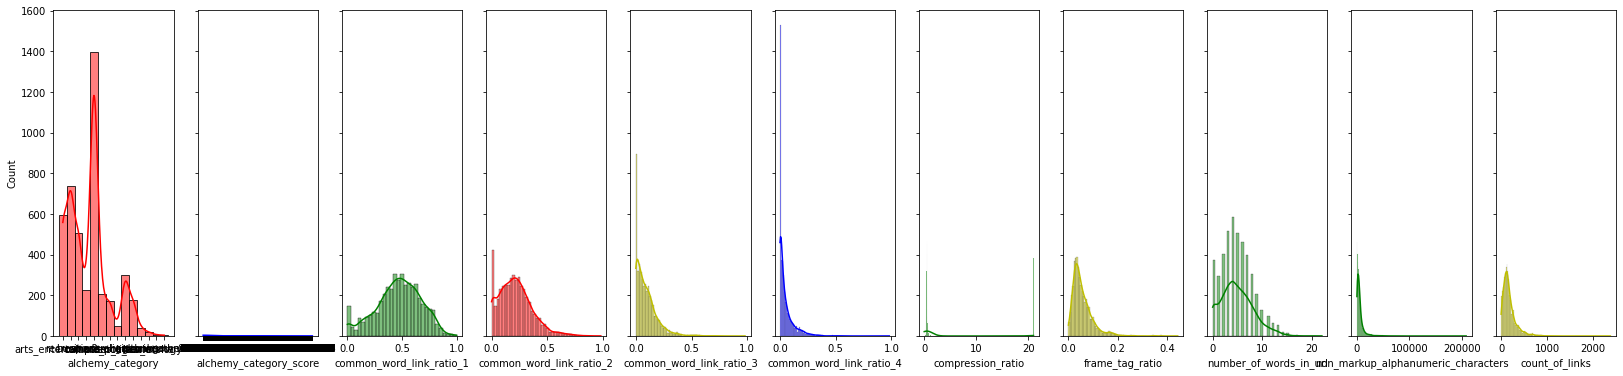

In [17]:
fig, axes = plt.subplots(1, 11, figsize=(28, 6), sharey=True)
sns.histplot(train_d, ax=axes[0], x="alchemy_category", kde=True, color='r')
sns.histplot(train_d, ax=axes[1], x="alchemy_category_score", kde=True, color='b')
sns.histplot(train_d, ax=axes[2], x="common_word_link_ratio_1", kde=True,color='g')
sns.histplot(train_d, ax=axes[3], x="common_word_link_ratio_2", kde=True,color='r')
sns.histplot(train_d, ax=axes[4], x="common_word_link_ratio_3", kde=True,color='y')
sns.histplot(train_d, ax=axes[5], x="common_word_link_ratio_4", kde=True,color='b')
sns.histplot(train_d, ax=axes[6], x="compression_ratio", kde=True,color='g')
sns.histplot(train_d, ax=axes[7], x="frame_tag_ratio", kde=True,color='y')
sns.histplot(train_d, ax=axes[8], x="number_of_words_in_url", kde=True,color='g')
sns.histplot(train_d, ax=axes[9], x="non_markup_alphanumeric_characters", kde=True,color='g')
sns.histplot(train_d, ax=axes[10], x="count_of_links", kde=True,color='y')


### **Checking Correlation Between the Columns:**

In [18]:
corr = train_d.corr()
corr

,link_id,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_based,frame_tag_ratio,...,html_ratio,image_ratio,lengthy_link_domain,link_word_score,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
link_id,1.000000,-0.004217,-0.007310,-0.000300,-0.002085,0.006074,-0.009806,0.018978,NaN,-0.010307,...,-0.001113,0.005791,-0.004570,-0.000016,0.020819,0.010868,-0.010894,0.005763,0.005010,0.021716
avg_link_size,-0.004217,1.000000,0.120985,0.160316,0.176031,0.148610,-0.005600,0.007038,NaN,-0.048662,...,0.016260,-0.007372,0.013730,0.133817,-0.017873,0.000781,-0.043844,0.010648,0.047677,0.005398
common_word_link_ratio_1,-0.007310,0.120985,1.000000,0.805342,0.560227,0.386097,-0.029553,0.013631,NaN,-0.313624,...,-0.208579,-0.046301,0.404539,0.264072,0.192458,0.341290,0.122082,-0.076880,-0.035398,0.058873
common_word_link_ratio_2,-0.000300,0.160316,0.805342,1.000000,0.759688,0.548431,-0.035124,0.022150,NaN,-0.268646,...,-0.160811,-0.028994,0.386598,0.265193,0.161895,0.309584,0.078517,-0.079690,-0.030759,0.067576
common_word_link_ratio_3,-0.002085,0.176031,0.560227,0.759688,1.000000,0.845739,-0.007892,0.004938,NaN,-0.214456,...,-0.131972,-0.040345,0.353149,0.124930,0.241056,0.276632,0.044743,-0.014661,-0.011144,0.092130
common_word_link_ratio_4,0.006074,0.148610,0.386097,0.548431,0.845739,1.000000,-0.013823,0.005877,NaN,-0.176023,...,-0.139403,-0.030576,0.283215,0.068956,0.139295,0.224237,0.027499,0.028843,-0.015499,0.077746
compression_ratio,-0.009806,-0.005600,-0.029553,-0.035124,-0.007892,-0.013823,1.000000,-0.882862,NaN,0.190549,...,0.115050,-0.164585,-0.088347,0.161152,-0.066222,-0.067458,-0.035426,-0.041037,0.352327,-0.062290
embed_ratio,0.018978,0.007038,0.013631,0.022150,0.004938,0.005877,-0.882862,1.000000,NaN,-0.155218,...,-0.096711,0.141995,0.073075,-0.118211,0.050749,0.056953,0.041091,0.042420,-0.334953,0.042473
frame_based,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frame_tag_ratio,-0.010307,-0.048662,-0.313624,-0.268646,-0.214456,-0.176023,0.190549,-0.155218,NaN,1.000000,...,0.389829,-0.082178,-0.192843,0.152582,-0.296316,-0.392253,0.054361,-0.070536,0.036129,-0.186284


<AxesSubplot:>

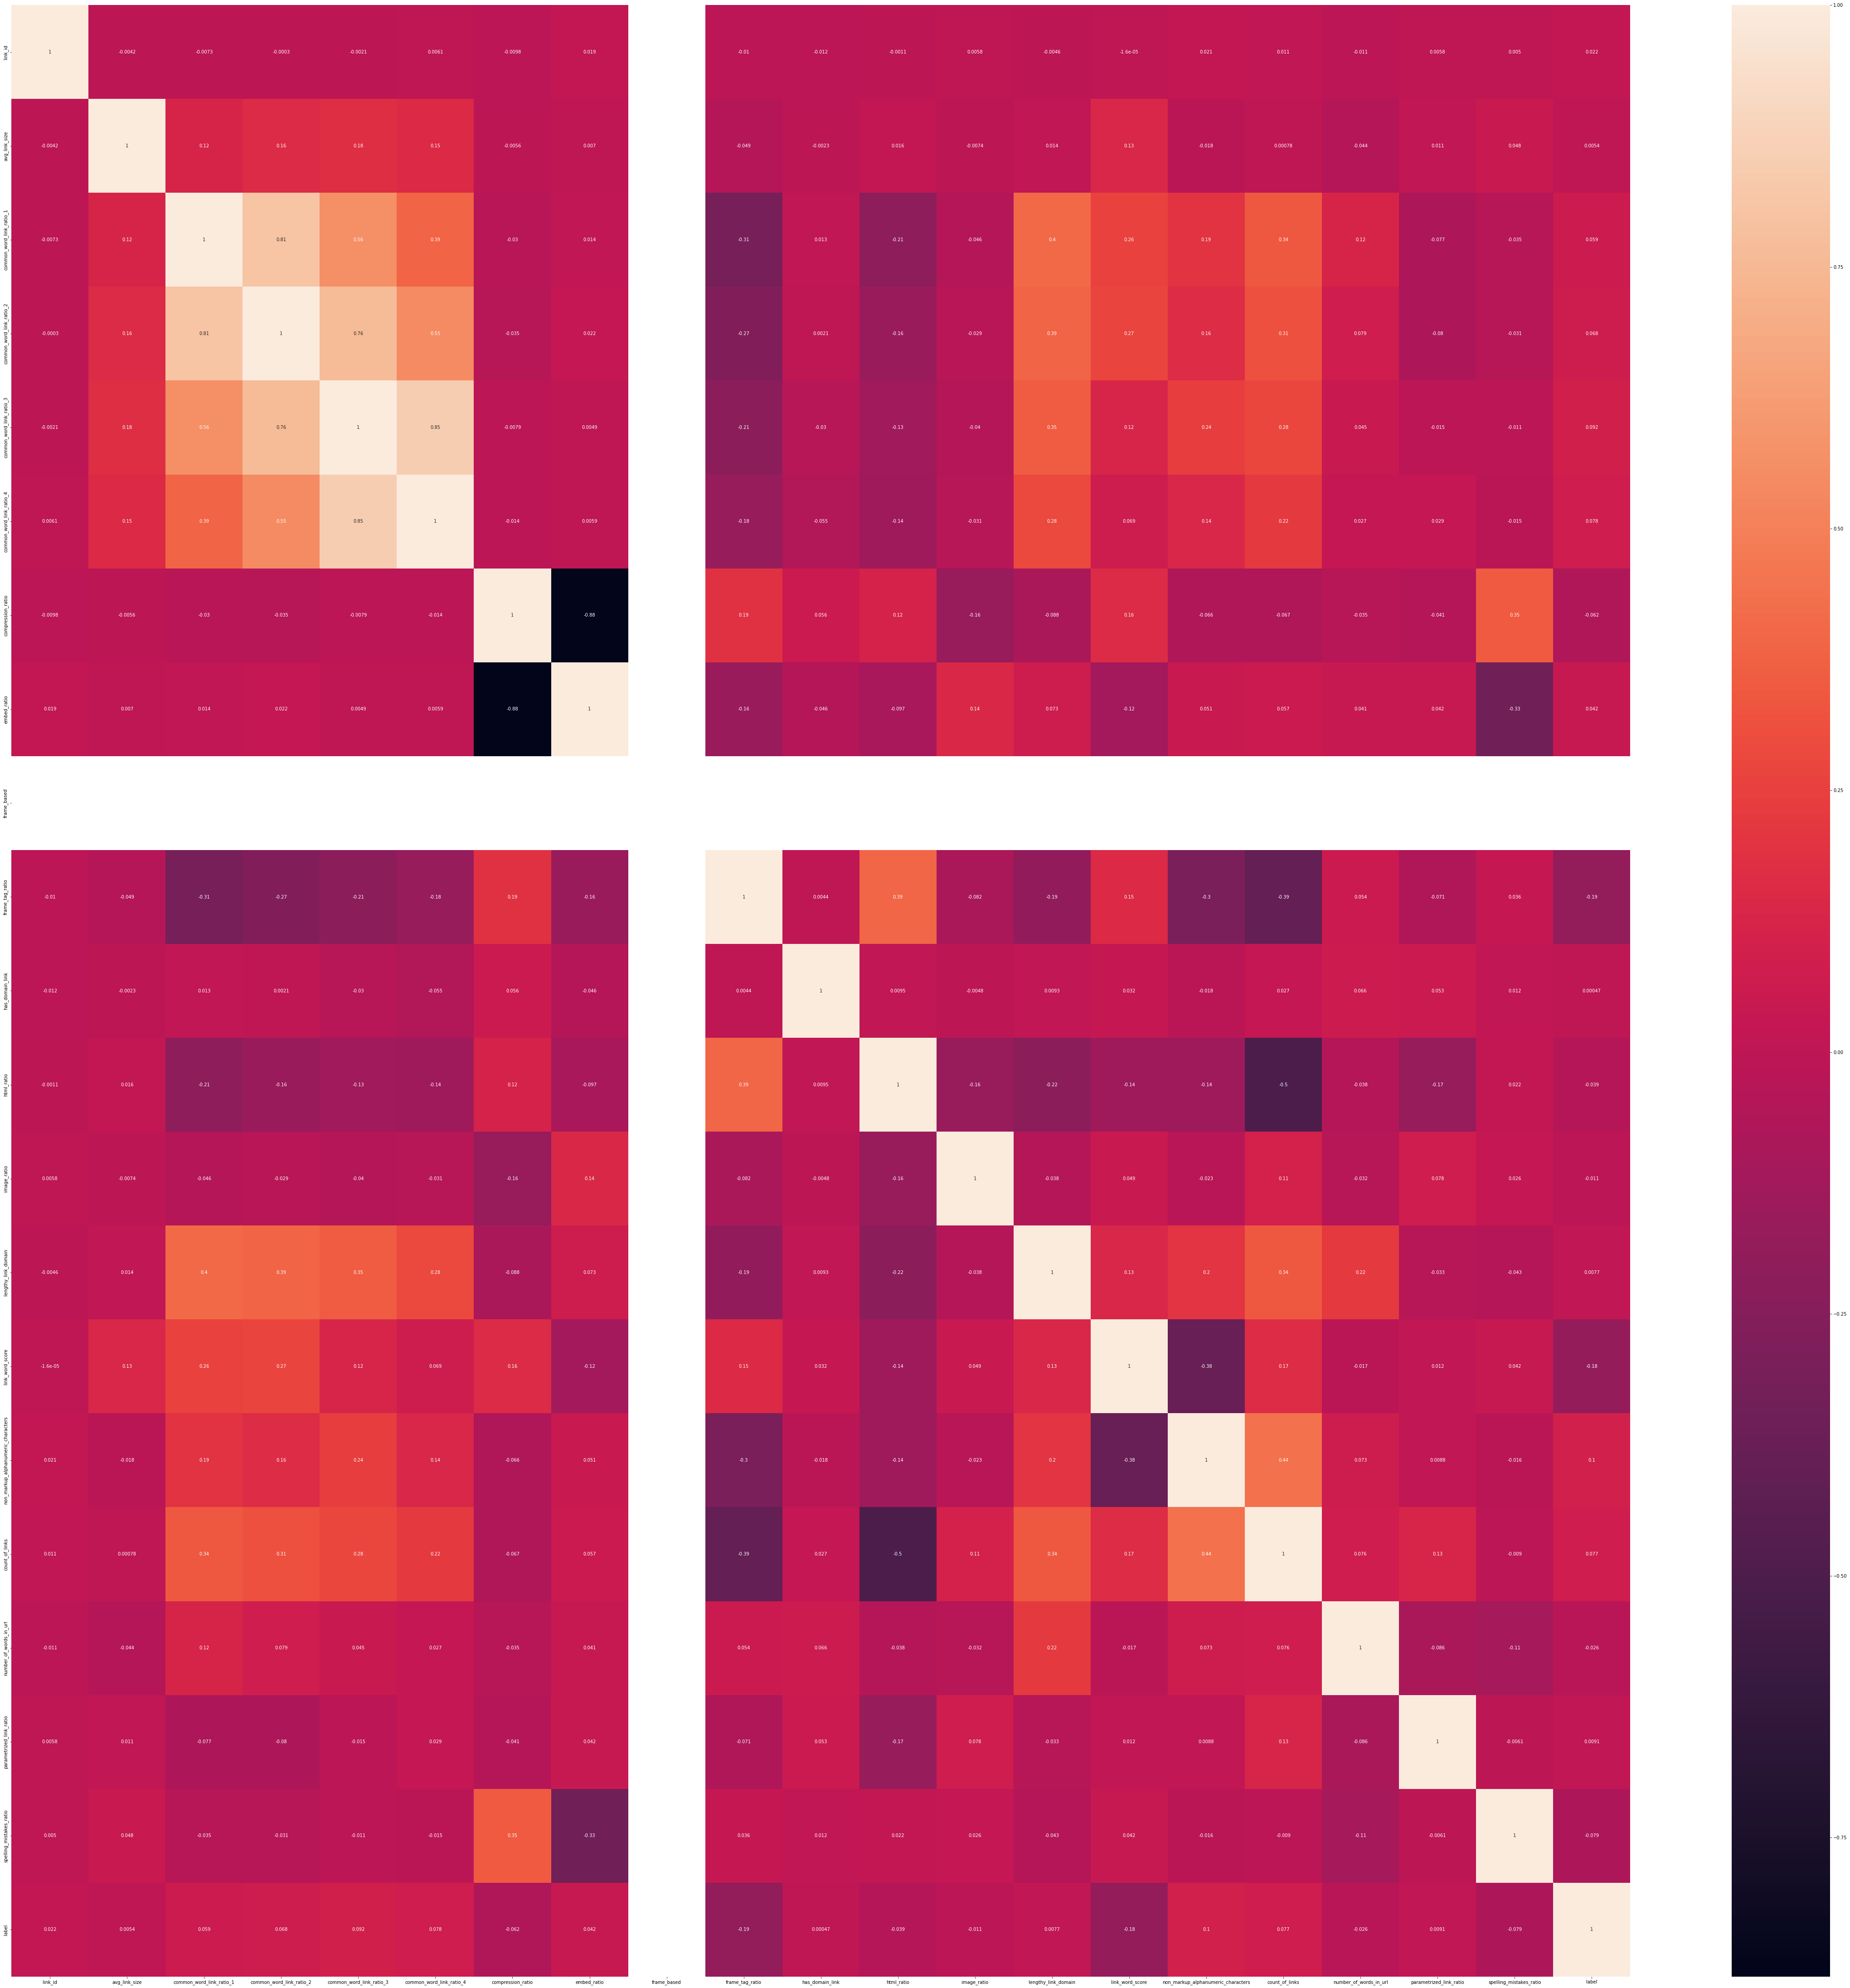

In [19]:
fig, ax = plt.subplots(figsize=(80, 80))
sns.heatmap(train_d.corr(),annot=True)

### **Drop some column based on correlation**

In [20]:
train_d.drop(['embed_ratio','frame_based','has_domain_link'], axis = 1, inplace =True)

In [21]:
test_d.drop(['embed_ratio','frame_based','has_domain_link'], axis = 1, inplace =True)

In [22]:
print(train_d.shape)
print(test_d.shape)

(4437, 24)
(2958, 23)


### **Normalizing Some Columns**

In [23]:
columns=['link_word_score','non_markup_alphanumeric_characters','count_of_links','number_of_words_in_url']
for column in columns:
    train_d[column] = (train_d[column] - train_d[column].min()) / (train_d[column].max() - train_d[column].min())

0       elle new england kitchen elle new england kitc...
1       alternet org story study confirms that fox new...
2                                            wiredberries
3       the health benefits of cayenne pepper brief hi...
4       recipe hearty mushroom potato soup if you re f...
                              ...                        
2953    whole wheat or bust blog of healthy and delici...
2954    maybe first since jesus to prevent and treat e...
2955    emptees from to emptees was vibrant community ...
2956    cost of living now outweighs benefits the onio...
2957    jokes just hanging on the wall just hanging on...
Name: page_description, Length: 2958, dtype: object

### **Cheking the missing/Null/special character values:**

In [ ]:
train_d['alchemy_category'].value_counts()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'alchemy_category', data=train_d)
plt.xticks(rotation = 90)

In [ ]:
(train_d == "?").sum()

In [ ]:
(test_d == '?').sum()

In [ ]:
train_d["alchemy_category"].unique()

In [ ]:
#test_d['alchemy_category'] = test_d['alchemy_category'].replace(['?'],'others')

### **Label Encoding: Using category codes approach:**

### *Apply on "alchemy_category"*

In [ ]:
#train_d["alchemy_category"] = train_d["alchemy_category"].astype('category')
#test_d["alchemy_category"] = test_d["alchemy_category"].astype('category')

In [ ]:
#train_d.dtypes

In [ ]:
#train_d["alchemy_category"] = train_d["alchemy_category"].cat.codes
#test_d["alchemy_category"] = test_d["alchemy_category"].cat.codes

In [ ]:
#train_d["alchemy_category"].unique()

In [ ]:
#test_d["alchemy_category"].unique()

In [ ]:
#train_d["alchemy_category"].value_counts()

### *Handling "?" from "alchemy_category_score"*

In [ ]:
train_d["alchemy_category_score"].value_counts()

In [ ]:
#train_d['alchemy_category_score'] = train_d['alchemy_category_score'].replace(['?'],0).astype('float64')
#test_d['alchemy_category_score'] = test_d['alchemy_category_score'].replace(['?'],0).astype('float64')

In [ ]:
#train_d.dtypes

In [ ]:
#train_d["alchemy_category_score"].unique()

In [ ]:
d=train_d["alchemy_category_score"].unique()
print(d)

In [ ]:
train_d.describe()

In [ ]:
#train_d['alchemy_category_score'] = train_d['alchemy_category_score'].replace([0.000000],0.4139967509803922).astype('float64')
#test_d['alchemy_category_score'] = test_d['alchemy_category_score'].replace([0.000000],0.4139967509803922).astype('float64')

### Use Intermediate Model for predicting "?" from alchemy_category and alchemy_category_score

Converting individual category into numbers

In [ ]:
 types=train_d['alchemy_category'].unique()
print(types)
for i,name in enumerate(types):
        train_d['alchemy_category']=train_d['alchemy_category'].replace(name,i)
        
testtype=test_d['alchemy_category'].unique()
print(testtype)
for i,name in enumerate(testtype):
        test_d['alchemy_category']=test_d['alchemy_category'].replace(name,i)

****? is replaced with '4' hence splitting the dataset based on value 4****

In [ ]:
df2=train_d[train_d['alchemy_category'] == 4] 

In [ ]:
df1 = train_d[train_d['alchemy_category'] != 4]

In [ ]:
df1.shape

**Predicting the value of ? using a model**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
y_train = df1['alchemy_category']
X_train=df1[['common_word_link_ratio_1','common_word_link_ratio_2','common_word_link_ratio_3','common_word_link_ratio_4','link_word_score','label']]
X_test=df2[['common_word_link_ratio_1','common_word_link_ratio_2','common_word_link_ratio_3','common_word_link_ratio_4','link_word_score','label']]
from sklearn.naive_bayes import GaussianNB


gnb = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
gnb_predictions[:50]

In [ ]:
df2['alchemy_category']=gnb_predictions

In [ ]:
(np.unique(gnb_predictions,return_counts=True))

**Replacing numbers with original alchemy category for one hot encoding**

In [ ]:
print(types)
for i,name in enumerate(types):
        df1['alchemy_category']=df1['alchemy_category'].replace(i,name)
for i,name in enumerate(types):
        df2['alchemy_category']=df2['alchemy_category'].replace(i,name)
        
        

**One hot encoding for alchemy category**

In [ ]:

  # Get all the unique values in a column
  col_types = df1['alchemy_category'].unique()

  # Insert all unique values as columns in the dataframe
  for col_type in col_types:
    df1[col_type] = [0 for i in range(len(df1['link_id']))]
  
  # Set the value of the column with the same name as value in the cell.
  for i, cell in enumerate(df1['alchemy_category']):
    df1[cell][i] = 1

  df1 = df1.drop('alchemy_category', 1)

In [ ]:
  # Get all the unique values in a column
  col_types = df2['alchemy_category'].unique()

  # Insert all unique values as columns in the dataframe
  for col_type in col_types:
    df2[col_type] = [0 for i in range(len(df2['link_id']))]
  
  # Set the value of the column with the same name as value in the cell.
  for i, cell in enumerate(df2['alchemy_category']):
    df2[cell][i] = 1

  df2 = df2.drop('alchemy_category', 1)

In [ ]:
# printing all columns of the dataframe
print(df1.columns.tolist())

print(df2.columns.tolist())



****Predicting alchemy category score by using alchemy category****

In [ ]:
from sklearn.linear_model import LinearRegression
y=df1['arts_entertainment']
x_train=df1[['arts_entertainment','recreation','sports','computer_internet','health','gaming','unknown','label']]
x_test=df2[['arts_entertainment','recreation','sports','computer_internet','health','gaming','unknown','label']]
Y_train = df1['alchemy_category_score']
reg = LinearRegression().fit(x_train, Y_train)
pre=reg.predict(x_test)

In [ ]:
print(np.unique(pre,return_counts=True))

df2['alchemy_category_score']=pre;

In [ ]:
import gc
combined=[df1,df2]
traindf1=pd.concat(combined)

**Training a model using TF IDF and other columns**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(traindf1["page_description"])

index=vectorizer.get_feature_names()
#print(index)

example = pd.DataFrame(X.toarray().transpose(),
                   index=vectorizer.get_feature_names())
example1=example.T

#example1['new']=traindf['common_word_link_ratio_1']
example1.insert(1,"ratio1",traindf1['common_word_link_ratio_1'],True)
example1.insert(2,"ratio2",traindf1['common_word_link_ratio_2'],True)
example1.insert(3,"ratio3",traindf1['common_word_link_ratio_3'],True)
example1.insert(4,"ratio4",traindf1['common_word_link_ratio_4'],True)
#example1.insert(5,"linkwordscore",traindf1['link_word_score'],True)
#example1.insert(6,"alchemy_category_score",traindf1['alchemy_category_score'],True)
#example1.insert(7,"arts_entertainment",traindf1['arts_entertainment'],True)
#example1.insert(8,"gaming",traindf1['gaming'],True)
#example1.insert(9,"recreation",traindf1['recreation'],True)
#example1.insert(10,"health",traindf1['health'],True)
#example1.insert(11,"computer_internet",traindf1['computer_internet'],True)
#example1.insert(12,"sports",traindf1['sports'],True)
#example1.insert(13,"unknown",traindf1['unknown'],True)

example1.head()

In [ ]:
ydata = traindf1["label"]
model = RandomForestClassifier(n_estimators = 100)
model.fit(example1,ydata)

**Predicting alchemy category and score for test dataset**

? is replaced with '2' hence splitting the dataset based on value 2

In [ ]:
df3 = test_d[test_d['alchemy_category'] != 2]

In [ ]:
df4 = test_d[test_d['alchemy_category'] == 2]

**Predicting ? using a model**

In [ ]:

ytrain = df3['alchemy_category']
Xtrain=df3[['common_word_link_ratio_1','common_word_link_ratio_2','common_word_link_ratio_3','common_word_link_ratio_4','link_word_score']]
Xtest=df4[['common_word_link_ratio_1','common_word_link_ratio_2','common_word_link_ratio_3','common_word_link_ratio_4','link_word_score']]



gnb = RandomForestClassifier(n_estimators = 100).fit(Xtrain, ytrain)
predi = gnb.predict(Xtest)
df4['alchemy_category']=predi 

**Replacing alchemy category numbers with its original value to perform one hot encoding**

In [ ]:
for i,name in enumerate(testtype):
        df3['alchemy_category']=df3['alchemy_category'].replace(i,name)
for i,name in enumerate(testtype):
        df4['alchemy_category']=df4['alchemy_category'].replace(i,name)

In [ ]:
# Get all the unique values in a column
col_types = df3['alchemy_category'].unique()

  # Insert all unique values as columns in the dataframe
for col_type in col_types:
    df3[col_type] = [0 for i in range(len(df3['link_id']))]
  
  # Set the value of the column with the same name as value in the cell.
for i, cell in enumerate(df3['alchemy_category']):
    df3[cell][i] = 1
df3 = df3.drop('alchemy_category', 1)

In [ ]:
# Get all the unique values in a column
col_types = df4['alchemy_category'].unique()

  # Insert all unique values as columns in the dataframe
for col_type in col_types:
    df4[col_type] = [0 for i in range(len(df4['link_id']))]
  
  # Set the value of the column with the same name as value in the cell.
for i, cell in enumerate(df4['alchemy_category']):
    df4[cell][i] = 1

testdf = df4.drop('alchemy_category', 1)

In [ ]:
df4.columns

In [ ]:
from sklearn.linear_model import LinearRegression

x_train=df3[['arts_entertainment','recreation','health']]
x_test=df4[['arts_entertainment','recreation','health']]
Y_train = df3['alchemy_category_score']
reg = LinearRegression().fit(x_train, Y_train)
pr=reg.predict(x_test)

In [ ]:
print(np.unique(pr,return_counts=True))

In [ ]:
df4['alchemy_category_score']=pr

combined1=[df3,df4]
testdf1=pd.concat(combined1)

In [ ]:
Y = vectorizer.transform(testdf1["page_description"])
examplete = pd.DataFrame(Y.toarray().transpose(),
                   index=vectorizer.get_feature_names())
exampletest=examplete.T

#example1['new']=traindf['common_word_link_ratio_1']
exampletest.insert(1,"ratio1",testdf1['common_word_link_ratio_1'],True)
exampletest.insert(2,"ratio2",testdf1['common_word_link_ratio_2'],True)
exampletest.insert(3,"ratio3",testdf1['common_word_link_ratio_3'],True)
exampletest.insert(4,"ratio4",testdf1['common_word_link_ratio_4'],True)
#exampletest.insert(5,"linkwordscore",testdf1['link_word_score'],True)
#exampletest.insert(6,"alchemy_category_score",testdf1['alchemy_category_score'],True)
#exampletest.insert(7,"arts_entertainment",testdf1['arts_entertainment'],True)
#exampletest.insert(8,"gaming",testdf1['gaming'],True)
#exampletest.insert(9,"recreation",testdf1['recreation'],True)
#exampletest.insert(10,"health",testdf1['health'],True)
#exampletest.insert(11,"computer_internet",testdf1['computer_internet'],True)
#exampletest.insert(12,"sports",testdf1['sports'],True)

ypred = model.predict_proba(exampletest)

In [ ]:
ypred

### Check random 20 rows :

# Apply NLP and text cleaning

In [18]:
import gensim

In [19]:
def remove_title(df):
    ans = "" 
    for text in df:
        ans+=text
        ans+=" "
    return ans
text = train_d['page_description'].apply(gensim.utils.simple_preprocess)
train_d['page_description'] = text.apply(lambda x:remove_title(x))
text = test_d['page_description'].apply(gensim.utils.simple_preprocess)
test_d['page_description'] = text.apply(lambda x:remove_title(x))
train_d.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio,label
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,url cbc ca stevenandchris peggy ks sexy mood b...,arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,1,0,39,0,1236,98,8,0.061224,0.076125,1
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,title vegan potato spinach balls fat free vega...,recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,1,1,15,0,3887,230,8,0.330435,0.130742,1
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,title toshiba shows an ultra thin flexible ole...,business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,1,1,57,0,780,75,8,0.160000,0.076471,0
3,http://www.collegehumor.com/videos/playlist/64...,1326,url collegehumor videos playlist epic sports f...,arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,1,0,35,0,2388,192,6,0.005208,0.090909,0
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,title shaq admits to taking performance enhanc...,sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,1,1,39,0,5020,407,11,0.299754,0.093023,0


In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train_d["page_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
test_d["page_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
stop2 = ['title','body','url']

train_d["page_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop2))
test_d["page_description"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop2))

0       elle new england kitchen elle new england kitc...
1       alternet org story study confirms that fox new...
2                                            wiredberries
3       the health benefits of cayenne pepper brief hi...
4       recipe hearty mushroom potato soup if you re f...
                              ...                        
2953    whole wheat or bust blog of healthy and delici...
2954    maybe first since jesus to prevent and treat e...
2955    emptees from to emptees was vibrant community ...
2956    cost of living now outweighs benefits the onio...
2957    jokes just hanging on the wall just hanging on...
Name: page_description, Length: 2958, dtype: object

### *Analyzing the frequency of words in "page_description"*

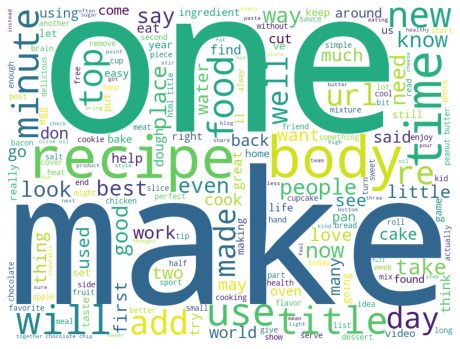

In [21]:
from nltk.corpus import stopwords
#More frequently occuring words appear larger.


from wordcloud import WordCloud,STOPWORDS
content=''
stopwords_d=set(STOPWORDS)

for i in train_d['page_description']:
    tokens=i.split(' ')
    
    content=content+' '.join(tokens)+' '

wordcloud_d=WordCloud(width=800,height=600,background_color='white',stopwords=stopwords_d).generate(content)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wordcloud_d)

### Apply TF-IDF:

In [ ]:
vectorizer = TfidfVectorizer(max_features = 45000, ngram_range = (1,5))
X = vectorizer.fit_transform(train_d["page_description"])

In [ ]:
X.shape

In [ ]:
train_d.shape

In [ ]:
X.shape

In [ ]:
#X = X.toarray()

In [ ]:
train_d["news_front_page"].value_counts()

In [ ]:
train_d["is_news"].value_counts()

In [ ]:
doc1 = X

In [ ]:
doc1

In [ ]:
#doc1 = np.hstack(X,)

In [ ]:
ydata = train_d["label"]

# Hyperparameter Tuning with GridserchCV on SVM

In [ ]:
from sklearn.model_selection import GridSearchCV 

  
# defining parameter range 

param_grid = {'C': [0.1, 1],  

              'gamma': [1, 0.1], 

              'kernel': ['rbf']}  

  

grid = GridSearchCV(SVC(probability = True), param_grid, refit = True, verbose = 3) 

  
# fitting the model for grid search 
grid.fit(train_df, ydata) 

### **Apply Model**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



### Train Model 

In [ ]:
ydata

In [ ]:

model2 = RandomForestClassifier(n_estimators = 100) 
 

model2.fit(X, ydata)

In [40]:
from sklearn.svm import SVC

In [ ]:

svclassifier = SVC(kernel='rbf',probability = True)
svclassifier.fit(X, ydata)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
 svm = LinearSVC()
 clf = CalibratedClassifierCV(svm) 
 clf.fit(train_df, ydata)


In [ ]:
logisticRegr = LogisticRegression()

model = LogisticRegression()

model.fit(train_df, ydata)

### Column to predict : 

In [ ]:
Y = vectorizer.transform(test_d["page_description"])

# Word2Vec Implementation

In [22]:
import gensim
from gensim.models import Word2Vec,KeyedVectors
i=0
sentances_to_train = []
sentences_to_test=[]
for sentances in train_d['page_description']:
    sentances_to_train.append(sentances.split())
for sentances in test_d['page_description']:
    sentances_to_train.append(sentances.split())


In [23]:
w2v_model = Word2Vec(sentances_to_train, min_count=2, vector_size=200, workers=4)
#w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [24]:
text = train_d['page_description'].apply(gensim.utils.simple_preprocess)
test = test_d['page_description'].apply(gensim.utils.simple_preprocess)
train_d['web'] = text
#test_d['web']
test_d['web']=test

In [25]:
make_vector = []
def avg_word2_vec(df):
    sc = np.zeros(200)
    i=0
    for text1 in df:
        if text1 not in w2v_model.wv.key_to_index:
            continue
        scq = w2v_model.wv.get_vector(text1)
        sc += scq
        i+=1
    sc = sc/i
    sc = np.array(sc)
    make_vector.append(sc)
    return sc

In [26]:
make_test=[]
def avg_word2_test(df):
    sc = np.zeros(200)
    i=0
    for text1 in df:
        if text1 not in w2v_model.wv.key_to_index:
            continue
        scq = w2v_model.wv.get_vector(text1)
        sc += scq
        i+=1
    sc = sc/i
    sc = np.array(sc)
    make_test.append(sc)
    return sc

In [27]:
vectorized = train_d['web'].apply(lambda x:avg_word2_vec(x))
vectorizedtest = test_d['web'].apply(lambda x:avg_word2_test(x))

In [28]:
make_vector = np.array(make_vector)
make_test = np.array(make_test)
make_vector.shape

(4437, 200)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,NuSVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
grid.fit(np.array(make_vector),train_d['label'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   9.6s
[CV] END .....................................C=0.1, gamma=1; total time=   9.5s
[CV] END .....................................C=0.1, gamma=1; total time=   9.4s
[CV] END .....................................C=0.1, gamma=1; total time=   9.8s
[CV] END .....................................C=0.1, gamma=1; total time=   9.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   6.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   6.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   6.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   6.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   6.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   7.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [41]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001, probability=True)


In [39]:

model9=SVC(C=100, gamma=0.001,probability=True)
model9.fit(np.array(make_vector),train_d['label'])

SVC(C=1, gamma=0.1, probability=True)

In [ ]:
ypred = model9.predict_proba(np.array(make_test))

## Slacking :

In [ ]:
ypred1 = model1.predict_proba(Y).T[1]
ypred2  = svclassifier.predict_proba(Y).T[1]
ypred3 = model2.predict_proba(Y).T[1]
ypred = (ypred1+ypred2+ypred3)/3

## Vooting :

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

### create a voting classifier with hard voting

In [41]:

voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('lr', LogisticRegression()),
                  ('gnb', SVC())], 
    voting='hard')



### create a voting classifier with soft voting



In [42]:
voting_classifier_soft = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('lr', LogisticRegression()),
                  ('gnb', SVC())], 
    voting='soft')

## Make prediction using hard and soft vooting : 

In [ ]:

voting_classifier_hard.fit(train_df, ydata)
y_pred_vch = voting_classifier_hard.predict(Y)


voting_classifier_soft.fit(train_df, ydata)
y_pred_vcs = voting_classifier_soft.predict(Y)

In [ ]:
ypred.shape

In [ ]:
ypred = ypred.T[1]
ypred = ypred.T
ypred

In [ ]:
ypred.shape

In [ ]:
ypred

In [ ]:
sub = pd.read_csv("../input/aid-escalating-internet-coverage/sample_submission.csv")
sub.head()

***if model after suffling dataframe based on alchemy category is used uncomment line 2***

In [ ]:
sub["label"] = ypred
#sub['link_id']=testdf1['link_id']       #if model after suffling dataframe based on alchemy category is used
sub.head()

#### *Expoting the output file:*

In [ ]:
sub.to_csv('./submission14.csv',index = False)

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score as rac

### **Checking Accuracy using ROC Curve and AUC:**

In [ ]:
skf = StratifiedKFold(n_splits = 4,shuffle = True)
ydata = train_d['label']
skf.get_n_splits(train_df, ydata)
print(skf)
model = KNeighborsClassifier(n_neighbors=50,leaf_size = 20)
#StratifiedKFold(n_splits=4, random_state=None, shuffle=True)
racs = []
for train_index, test_index in skf.split(train_df, ydata):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train_df[train_index], train_df[test_index]
    y_train, y_test = ydata[train_index], ydata[test_index]
    model.fit(X_train,y_train)
    ypred = model.predict_proba(X_test)
    ypred = ypred.T[1]
    racs.append(rac(y_test,ypred))
print(np.mean(racs))